# **In Class Assignment2**

In [85]:
# import neccessary libraries
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **1.**

In [86]:
# import 4 csv files
df_mobile = pd.read_csv('MASTER_PhonesmartdataAll_CCI_AdvStats.csv')
df_housing = pd.read_csv('Housing.csv')
# df_wine = pd.read_csv('wine_data.csv')
df_data = pd.read_csv('data.csv')

# # print the first 5 rows of each dataset
# print(df_mobile.head())
# print('\n')
# print(df_housing.head())
# print('\n')
# print(df_wine.head())
# print('\n')
# print(df_data.head())

   Year Age GenderNum AutismQuotient STAI BRIEF_Total Device DailyAvgMins  \
0  2022             2              4   49          70                       
1  2021  37         2              8   44          33                       
2  2022             1                                                       
3  2022             1                                                       
4  2022             2                                                       

  DailyAvePickups  VS_RT_correct_Conjunction  VS_RT_correct_Single  
0                                1178.700000           1216.387500  
1                                 946.470000            785.597500  
2                                1182.741667            950.900000  
3                                1778.950000            984.333333  
4                                 521.500000            503.000000  


   0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00
0   0.02731   0.00   7

## **1. For each dataset, Identify the a. type (eg: Linear/NonLinear; Single/Multilabel) and b. tasks possible on the dataset (Classification/Regression) and justify your answer with the following evidences**

**a. Inspect and report based on the type of variables based on your basic domain knowledge/context**

**b. Any one exploratory analysis technique**

**c. Any one Inferential analysis technique**

**d. Any one predicative analysis technique**

### **MASTER_PhonesmartdataAll_CCI_AdvStats.csv**

**TYPE: Multilabel dataset with a mix of numerical and categorical data. The presence of a mix of continuous and categorical variables (like GenderNum, AutismQuotient) suggests that relationships between variables are likely to be non-linear.**

**Tasks Possible: Regression.**

**a. The dataset includes a mix of numerical and categorical variables. For instance, Age, STAI (State-Trait Anxiety Inventory scores), and VS_RT_correct_Conjunction are numerical, whereas GenderNum and AutismQuotient appear to be categorical. This mix of variable types often leads to non-linear relationships in the data. Also the presence of multiple distinct types of variables suggests that the dataset can address various questions (multilabel), such as predicting psychological scores (regression).**

**b. Exploratory Analysis Technique**

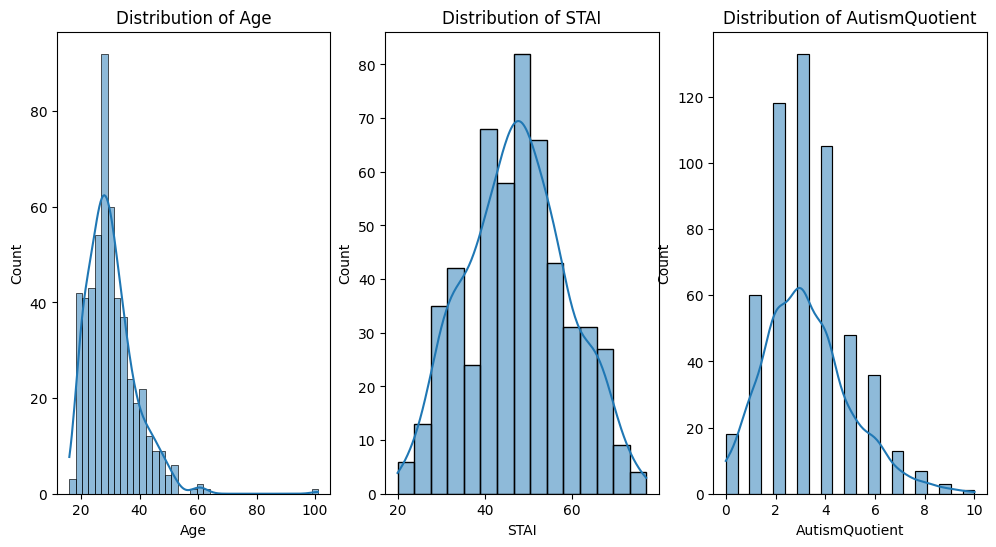

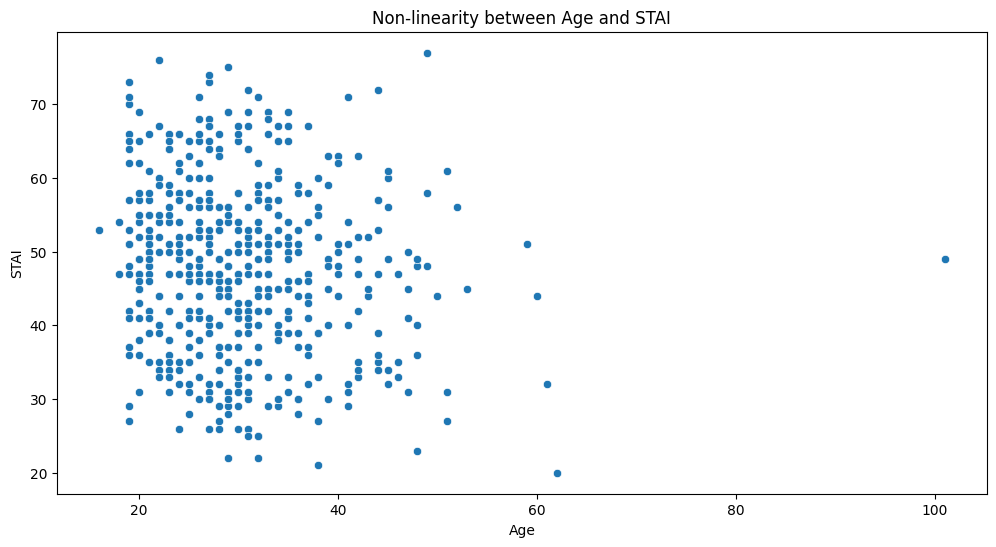

In [87]:
# visualize distribution of key variables in df_mobile

# convert object-type columns to numerical where appropriate
df_mobile_numerical = df_mobile.apply(pd.to_numeric, errors='coerce')

# Visualize distributions of some key variables using histograms
plt.figure(figsize=(12, 6))
for i, col in enumerate(['Age', 'STAI', 'AutismQuotient']):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df_mobile_numerical[col], kde=True)
    plt.title(f'Distribution of {col}')

# visualize the non-linearity between Age and STAI
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='STAI', data=df_mobile_numerical)
plt.title('Non-linearity between Age and STAI')
plt.show()

**c. Inferential Analysis Technique**

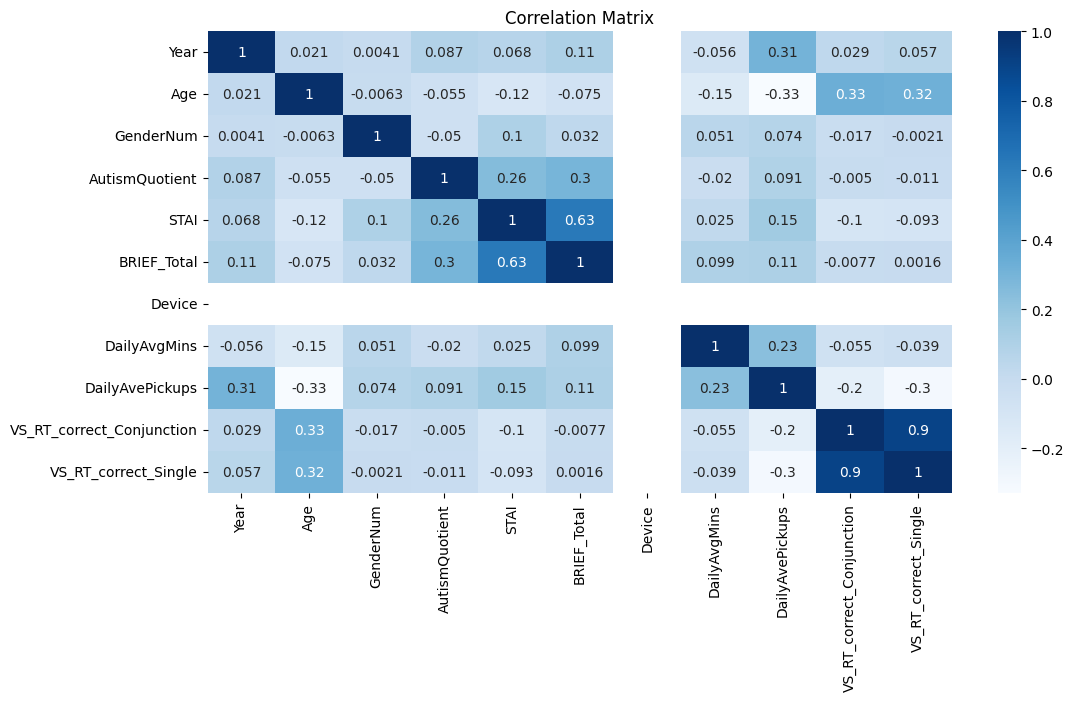

In [88]:
# correlation analysis
# correlation matrix
corr_matrix = df_mobile_numerical.corr()

# visualize the correlation matrix using heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

**d. Predictative Analysis Technique**

In [89]:
# regression based on STAI and Age
# import libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# prepare the data
df1 = pd.read_csv('MASTER_PhonesmartdataAll_CCI_AdvStats.csv')
df1_cleaned = df1[df1['Age'] != ' ']
df1_cleaned = df1_cleaned[df1_cleaned['STAI'] != ' ']
df_mobile_numerical = df1_cleaned.apply(pd.to_numeric, errors='coerce')


# split the data into training and testing sets
X = df_mobile_numerical[['Age']]
y = df_mobile_numerical['STAI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate the model
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')


RMSE: 11.067986123045609


**By executing regression between variables within the dataset, we can explore the inferential relationship between two or multiple variables, and therefore predict the trend of the variable base on the regression result. In the last python code cell we gain a RMSE of 10.83 between Age and STAI score variables, it seems that the two variables are not in a strong relationship.**

### **housing.csv**

**TYPE: Single label dataset.**

**Tasks Possible: Regression.**

In [103]:
df_housing = pd.read_csv('Housing.csv')
df_info = df_housing.info()
df_describe = df_housing.describe()
df_type = df_housing.dtypes

df_info, df_describe, df_type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


(None,
               price          area    bedrooms   bathrooms     stories  \
 count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
 mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
 std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
 min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
 25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
 50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
 75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
 max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   
 
           parking  
 count  545.000000  
 mean     0.693578  
 std      0.861586  
 min      0.000000  
 25%      0.000000  
 50%      0.000000  
 75%      1.000000  
 max      3.000000  ,
 price                int64
 area                 int64
 bedrooms             int64
 bathrooms            int64
 stories              i

**a. The dataset columns are either of type float64, int64 or object, indicating nonlinearity. It is multilabel dataset as there are multiple label names in appearance. The variables could represent various aspects related to housing, such as prices, sizes or other quantitative metrics. It might be suitable for Regression as there are no clear classes of house data in this dataset but regression can be done to predict the trend of metrics of housing in this case.**

**b. Exploratory Analysis Technique**

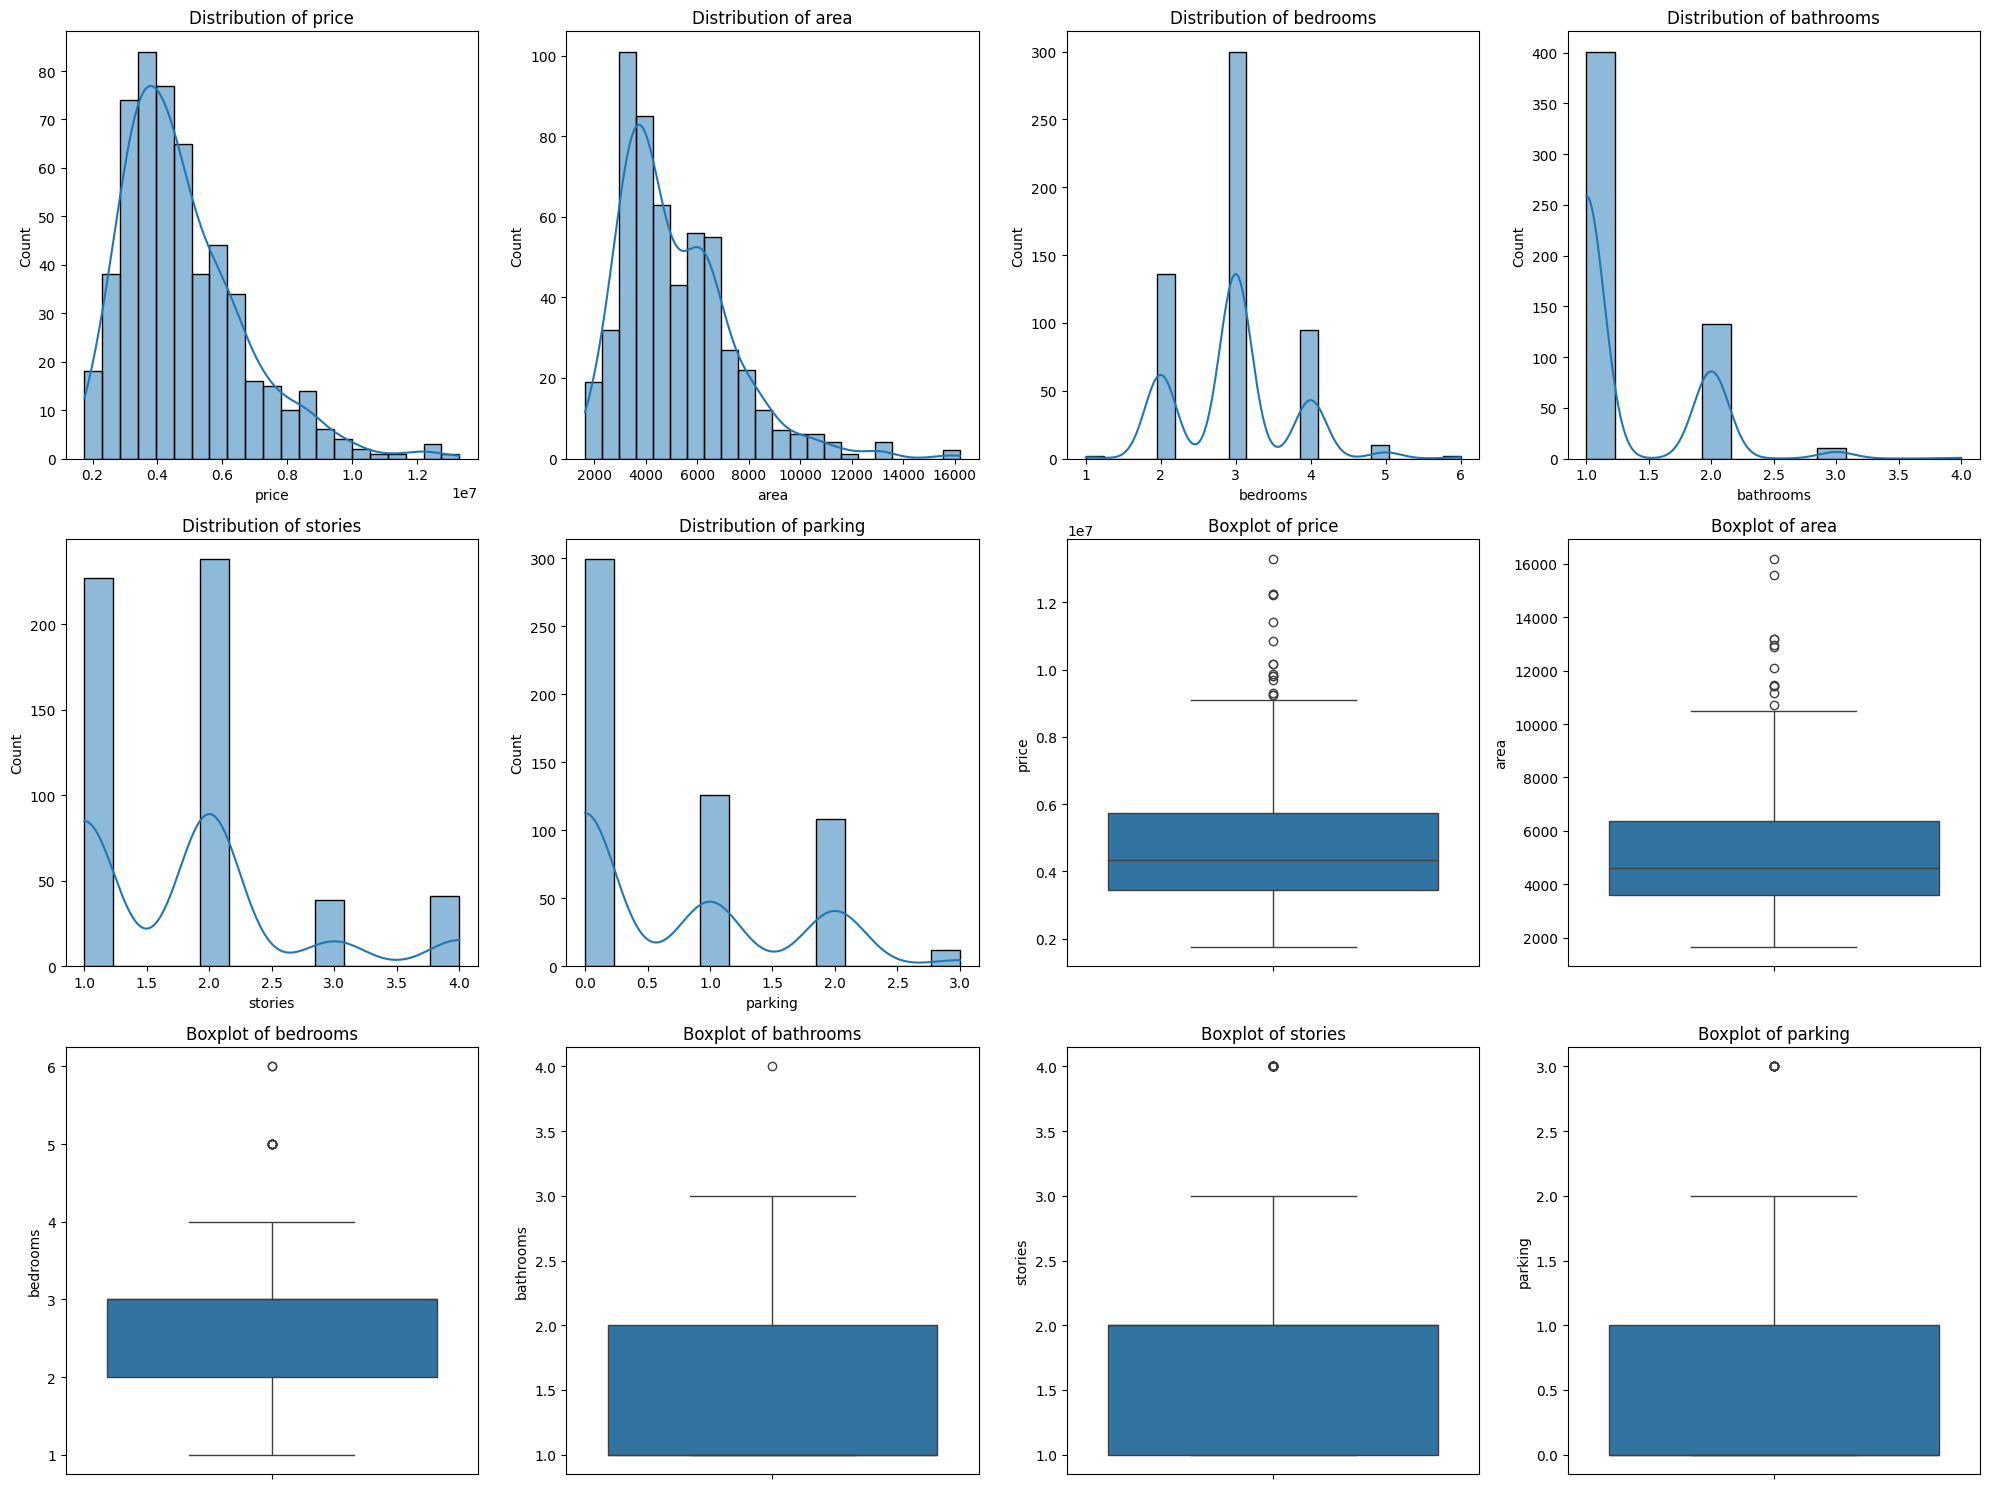

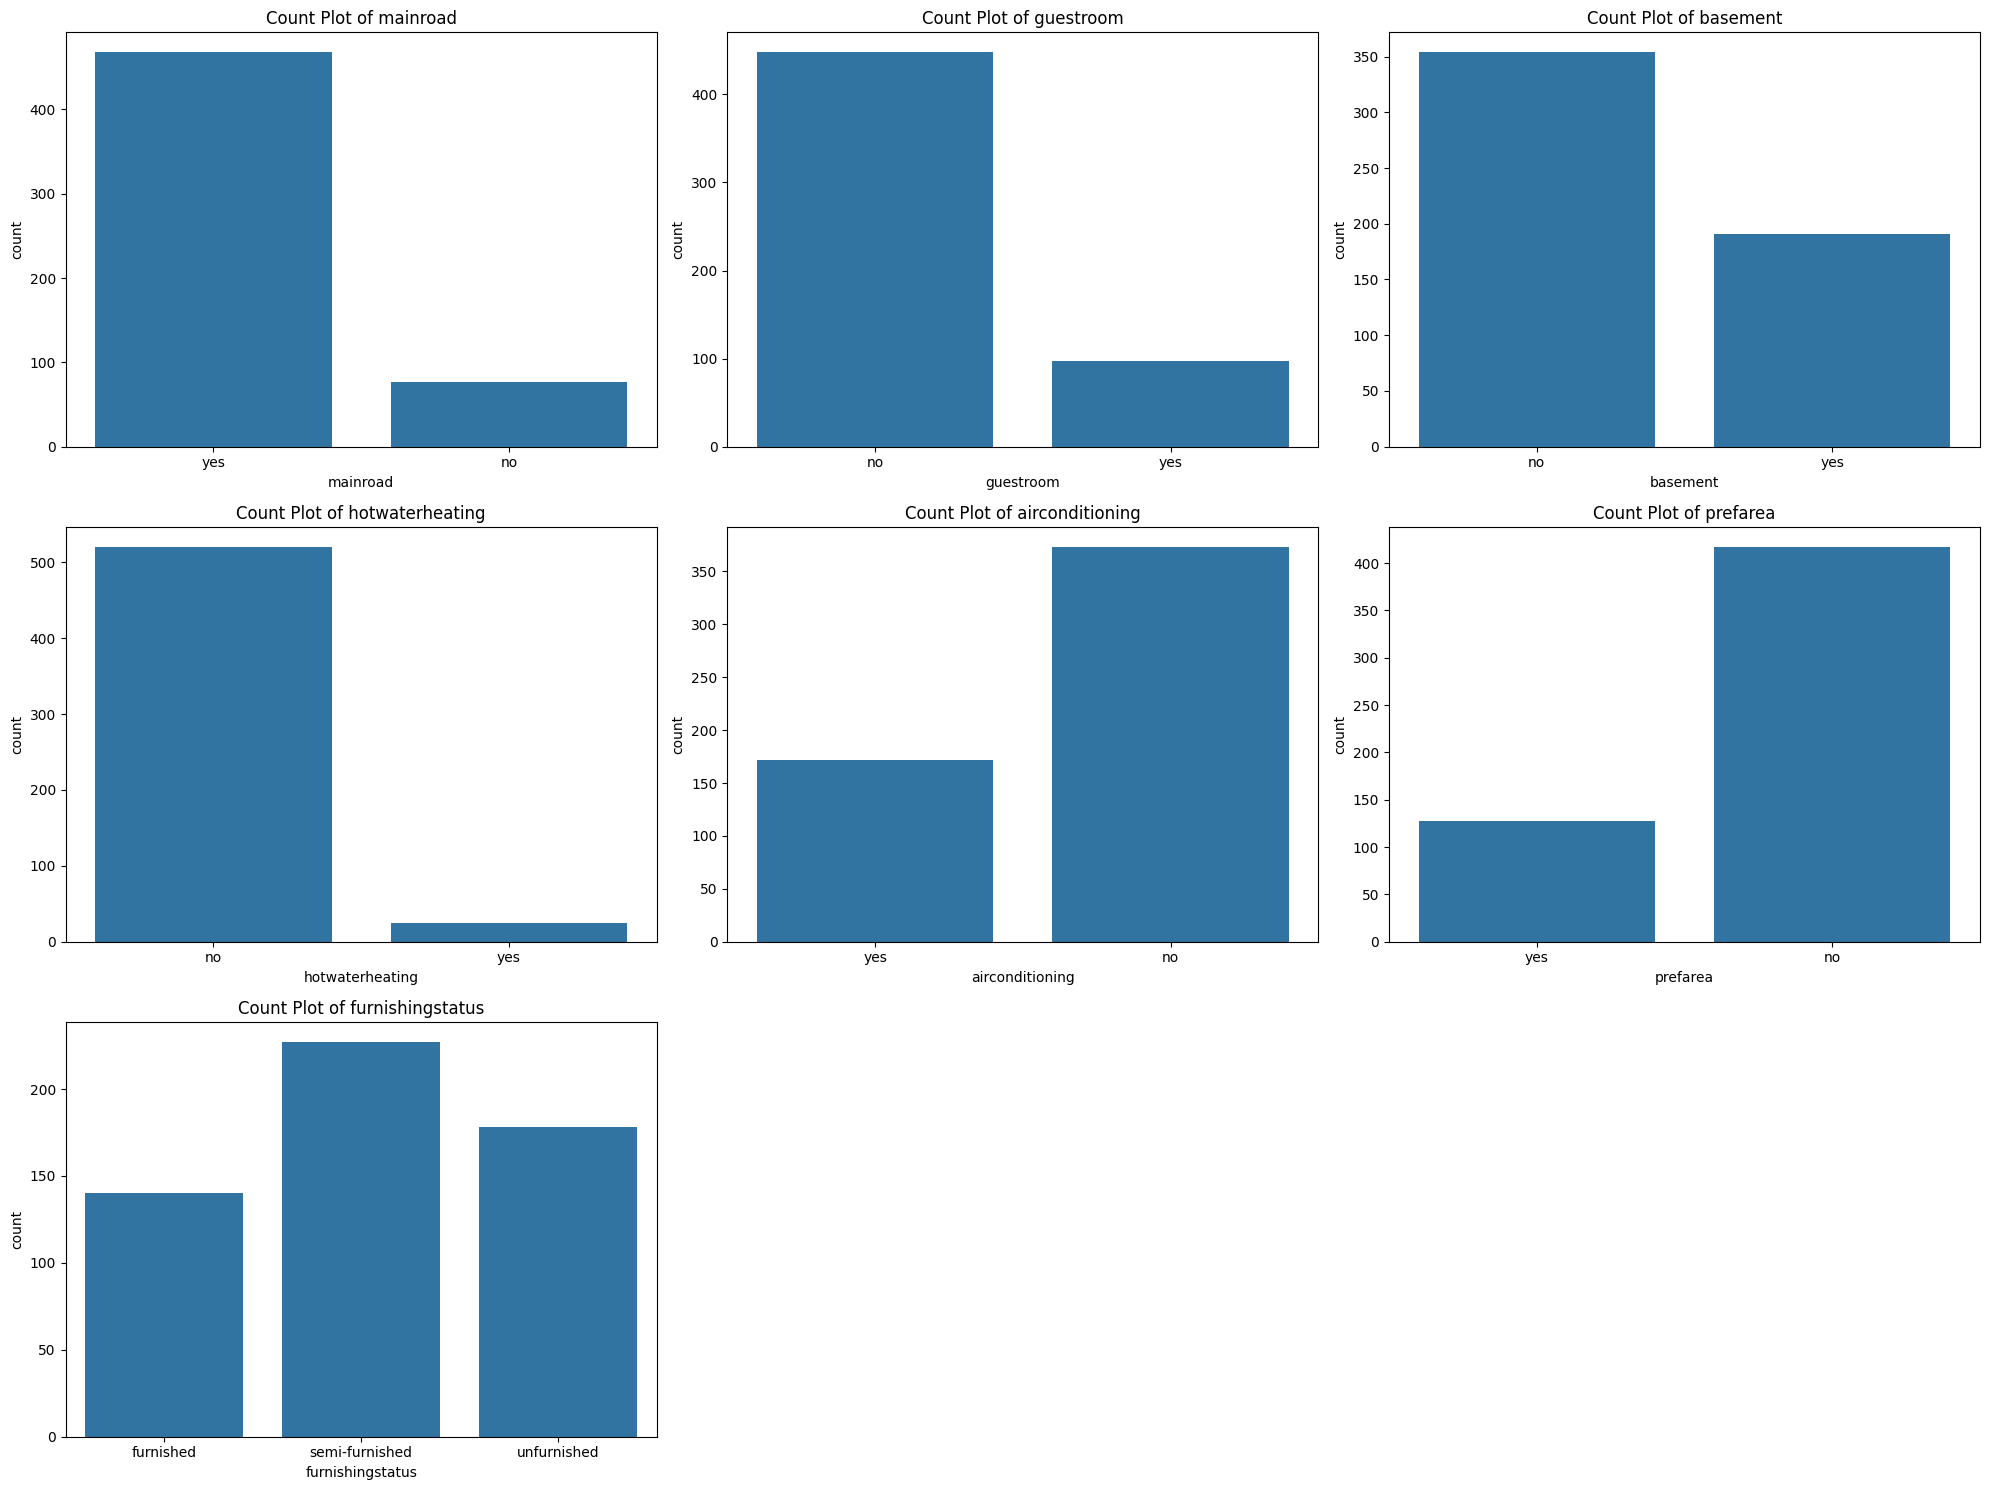

In [104]:
# Visualizing the numerical variables using histograms and boxplots
num_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Setting up the matplotlib figure
plt.figure(figsize=(20, 15))

# Enumerating through the numerical variables to create subplots for histograms
for i, var in enumerate(num_vars):
    plt.subplot(3, 4, i+1)
    sns.histplot(df_housing[var], kde=True)
    plt.title(f'Distribution of {var}')

# Enumerating through the numerical variables to create subplots for boxplots
for i, var in enumerate(num_vars):
    plt.subplot(3, 4, i+7)
    sns.boxplot(y=df_housing[var])
    plt.title(f'Boxplot of {var}')

plt.tight_layout()
plt.show()

# Now, we will visualize the categorical variables using count plots
cat_vars = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Setting up the matplotlib figure for categorical variables
plt.figure(figsize=(20, 15))

# Enumerating through the categorical variables to create subplots for count plots
for i, var in enumerate(cat_vars):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df_housing[var])
    plt.title(f'Count Plot of {var}')

plt.tight_layout()
plt.show()



**To explore the distribution of data, histogram and boxplots are suitable.**

**The price and area variables are right-skewed, indicating that there are a few very high values (expensive or large properties) that skew the distribution.**

**The bedrooms, bathrooms, and stories variables show that most houses have a moderate number of these features, with a few houses having more.**

**The parking variable suggests that not all properties have parking spaces, and very few have space for more than two vehicles.**

**The count plots for categorical variables (mainroad, guestroom, basin, hotwaterheating, airconditioning, prefarea, furnishingstatus) shows that: Most properties are on the main road and have air conditioning. Fewer properties have a guest room, basement, or hot water heating. The preference area (prefarea) is somewhat balanced, with a slight majority not preferring the area. The furnishingstatus variable has three categories, with 'semi-furnished' being the most common, followed by 'unfurnished' and 'furnished'.**

**c. Inferential Analysis Technique**

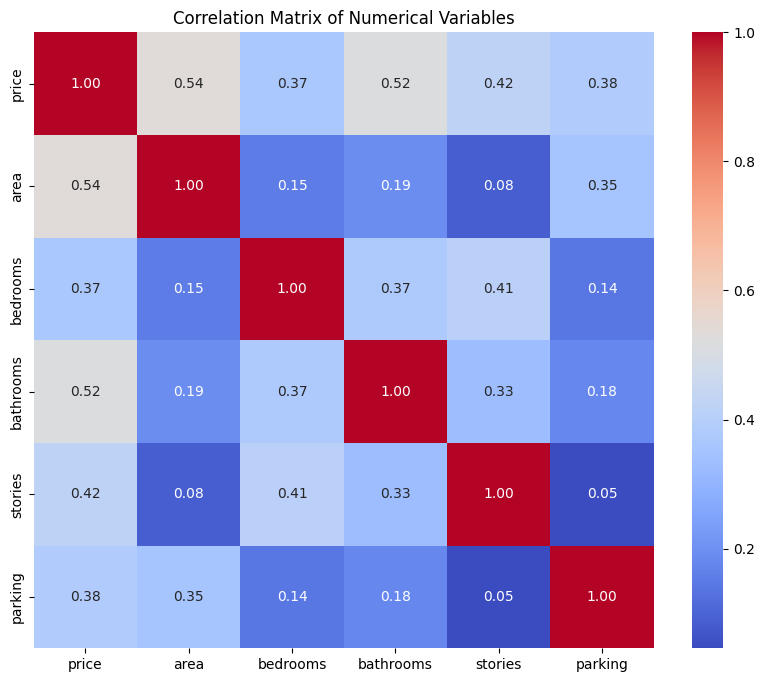

In [105]:
# Computing the correlation matrix for numerical variables
correlation_matrix = df_housing[num_vars].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

**The correlation matrix for the numerical variables reveals the following:**

**'price' has a moderate positive correlation with 'area' (0.54), 'bathrooms' (0.52), and 'stories' (0.42), suggesting that these features are related to the price of a house. This is consistent with domain knowledge, as larger areas, more bathrooms, and additional stories generally contribute to a higher property value. 'bedrooms' have a relatively low positive correlation with price (0.37), indicating that they do contribute to the price, but other factors might be more influential. 'parking' has a lower positive correlation with price (0.38) compared to 'area', 'bathrooms', and 'stories'.**

**d. Predictative Analysis Technique**

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Predictive modeling

# Defining the target variable and the features
X = df_housing['area'].values.reshape(-1, 1)
y = df_housing['price']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(3675286604768.185, 0.27287851871974644)

**The MSE (Mean Squared Error) of 3,675,286,604,768.185 is a very high value. This indicates that the average squared difference between the actual prices and the prices predicted by the model is quite large.**

**The R-squared (R²) score of 0.27287851871974644 means that approximately 27.29% of the variance in the house prices can be explained by the area variable. In other words, area as a single predictor provides some information about the house prices, but leaves a lot of variance unexplained.**

**According these findings, seems like the dataset is suitable for regression tasks however the outcome is not as accurate as expected.**

### **wine_data.csv**

**TYPE: Multilabel dataset with numerical data.**

**Tasks Possible: Regression and Classification.**

In [112]:
# load wine dataset from sklearn
from sklearn.datasets import load_wine
df_wine = load_wine()
# convert the dataset into a pandas dataframe
df_wine = pd.DataFrame(df_wine.data, columns=df_wine.feature_names)
# save the dataframe as a csv file
df_wine.to_csv('wine_data.csv')
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


**The dataset contains several numerical variables, each likely representing different chemical or physical properties of wine, such as alcohol content, malic acid, ash, alcalinity of ash, magnesium, total phenols, flavanoids, nonflavanoid phenols, proanthocyanins, color intensity, hue, OD280/OD315 of diluted wines, and proline. These variables are continuous in nature and are typical for datasets used in classification tasks in the domain of food chemistry or oenology, however without a target to classify, it is hard to do the classification with only the dataset, therefore the creation of a regression model is appropriate in this case.**

**b. Exploratory Analysis Technique**

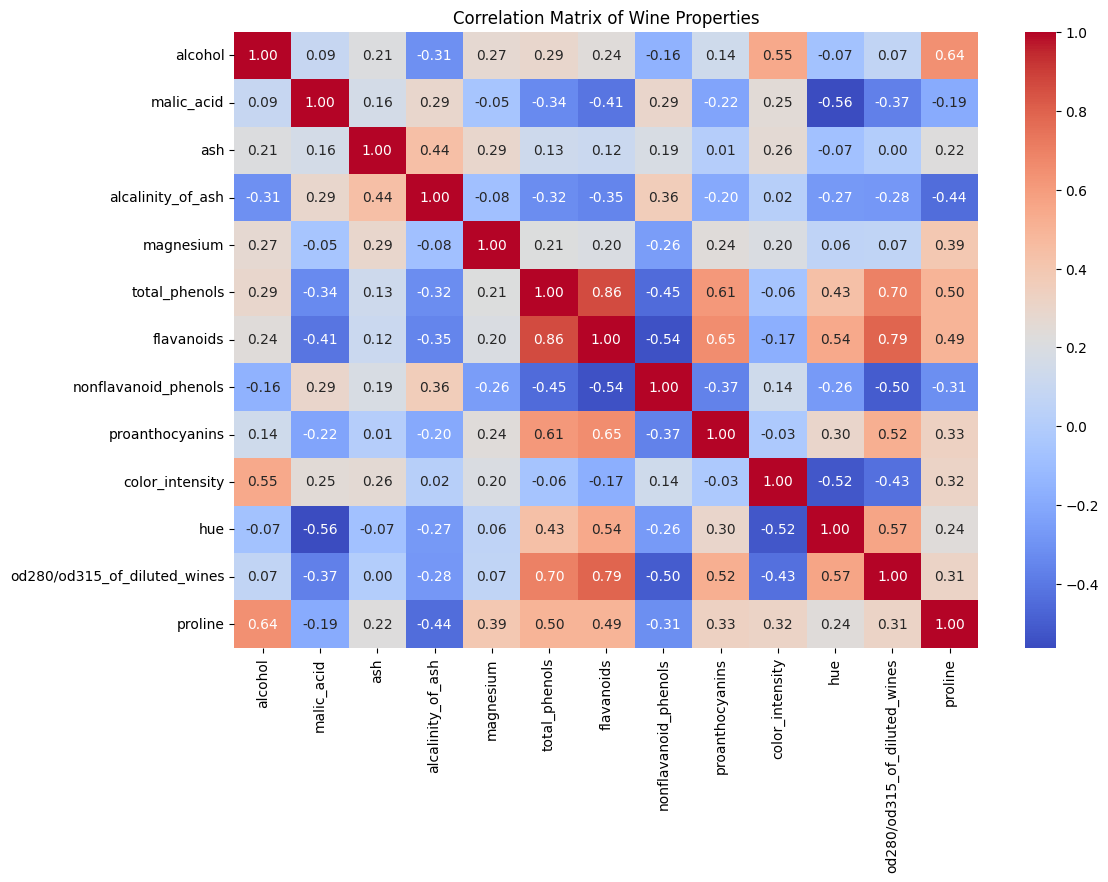

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_wine.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Wine Properties")
plt.show()

**From the correlation matrix heatmap, we can discover variable pairs in strong correlations, such as flavanoids and total_phenols.**

**c. Inferential Analysis Technique**

In [114]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the data
# Dropping non-numeric and target column (if any) for PCA
features = df_wine.select_dtypes(include=[float, int]).columns.tolist()
X = df_wine[features]

# Standardizing the features
X_std = StandardScaler().fit_transform(X)

# Apply PCA
# keep 2 principal components for visualization purposes
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_std)

# Creating a DataFrame for the principal components
principalDf = pd.DataFrame(data = principalComponents, columns = ['Principal Component 1', 'Principal Component 2'])

# Variance explained by each principal component
explained_variance = pca.explained_variance_ratio_

principalDf.head(), explained_variance

(   Principal Component 1  Principal Component 2
 0               3.316751              -1.443463
 1               2.209465               0.333393
 2               2.516740              -1.031151
 3               3.757066              -2.756372
 4               1.008908              -0.869831,
 array([0.36198848, 0.1920749 ]))

**The first principal component explains approximately 36.20% of the variance, while the second one accounts for about 19.21%. Together, they capture about 55.4% of the total variance in the dataset.**

**d. Predictative Analysis Technique**

In [117]:
# perform predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Defining the target variable and the features
X = principalDf[['Principal Component 1', 'Principal Component 2']]
y = df_wine['alcohol']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Creating the regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(0.1806773306387902, 0.7259650523687438)

**The mse and r2 score indicates that the model has a good fit with the data therefore this dataset is probably also suitable for classification tasks.**

### **data.csv**

**TYPE: Single label dataset with a mix of numerical data and strings.**

**Tasks Possible: Classification.**

**As there's string type data in existence, therefore the dataset is more likely to be non-linear.**

**b. Exploratory Analysis Technique**

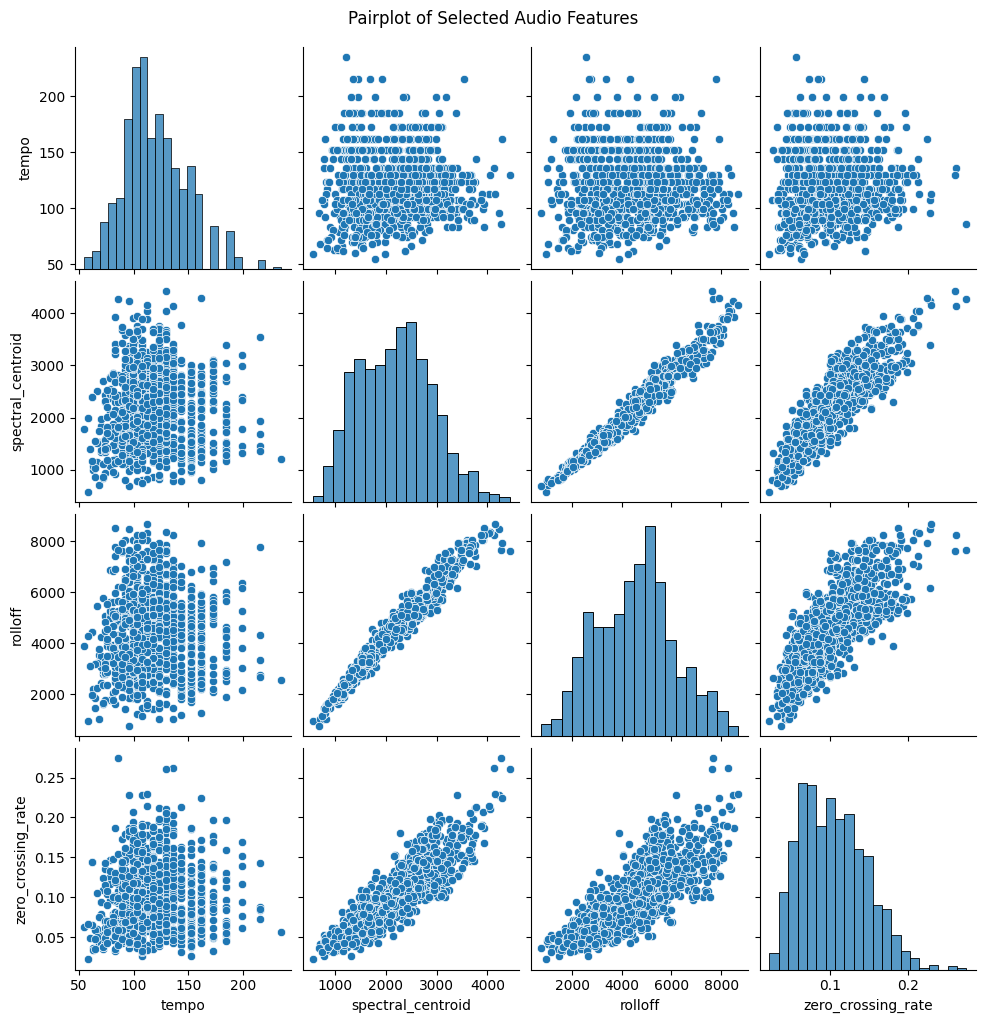

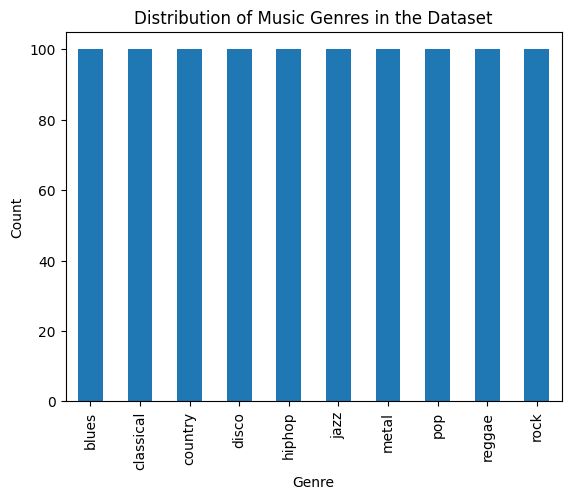

             tempo  spectral_centroid      rolloff  zero_crossing_rate
count  1000.000000        1000.000000  1000.000000         1000.000000
mean    119.601702        2201.834226  4571.702159            0.103637
std      28.297367         715.961347  1574.770035            0.041834
min      54.978391         569.930721   749.062137            0.021701
25%      99.384014        1627.793931  3380.956639            0.070281
50%     117.453835        2209.468780  4658.671830            0.099539
75%     135.999178        2691.969702  5534.197785            0.132007
max     234.907670        4434.439444  8676.405868            0.274829


In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('data.csv')

# Selecting 4 features for visualization
features_to_plot = ['tempo', 'spectral_centroid', 'rolloff', 'zero_crossing_rate']
sns.pairplot(data[features_to_plot])
plt.suptitle("Pairplot of Selected Audio Features", y=1.02)
plt.show()

# Counting the number of unique labels per row
label_counts = data['label'].value_counts()

# Displaying the distribution of labels
label_counts.plot(kind='bar')
plt.title("Distribution of Music Genres in the Dataset")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

# Basic Statistics
print(data[features_to_plot].describe())

**The pairplot visualizes relationships between selected audio features ('tempo', 'spectral_centroid', 'rolloff', 'zero_crossing_rate'). The plots do not show clear linear relationships between these features, suggesting complex, possibly non-linear relationships.**

**The bar plot of music genres in the dataset reveals distinct genres with no indication of multilabel characteristics. Each track appears to be assigned to a single genre, suggesting the dataset is single-label.**

**The basic statistical description of the selected features shows a wide range of values with varying means and standard deviations, further implying complex relationships within the data.**

**c. Inferential Analysis Technique**

**d. Predictative Analysis Technique**

In [120]:
# c and d combined

from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Inferential Analysis: ANOVA Test on 'tempo' feature across different genres
# Extracting 'tempo' values for each genre
genres = data['label'].unique()
tempo_values = [data[data['label'] == genre]['tempo'] for genre in genres]

# Performing ANOVA test
anova_result = f_oneway(*tempo_values)

# Predictive Analysis: Linear Regression Model
# Encoding the 'label' column for regression
label_encoder = LabelEncoder()
data['label_encoded'] = label_encoder.fit_transform(data['label'])

# Selecting 'tempo' as the feature and 'label_encoded' as the target
X = data[['tempo']]
y = data['label_encoded']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Results
anova_result, mse

(F_onewayResult(statistic=5.249430517606303, pvalue=5.264091590285547e-07),
 8.17360855057603)

**The ANOVA test resulted in a p-value of approximately 5.26 x 10^-7. This low p-value suggests that there are statistically significant differences in the 'tempo' feature across different music genres. This result supports the notion of a non-linear relationship between features and genres, as a simple linear association would likely not produce such varied results across categories.**

**The mean squared error (MSE) for the linear regression model is approximately 8.17. This relatively high error suggests that the model is not performing very well in predicting the genre based on the 'tempo' feature alone. This outcome supports the non-linearity hypothesis, as a linear model does not seem to capture the complexities of the data.**

**The dataset might not be ideally suited for regression tasks, at least not with simple linear models. The high MSE in the linear regression analysis indicates that the relationship between features and genres is more complex than what a linear model can capture. These findings suggest that the dataset is better suited for classification tasks with models capable of handling non-linear relationships.**

# **2,3&4.**

### **Functions:**

**L1 loss functions: Applicable to regression tasks.**

**L2 loss functions: Applicable to regression tasks.**

**Log loss functions: Applicable to Binary classification tasks.**

**Categorical cross entropy loss functions: Applicable to Multiclass classification tasks.**

**Hinge loss functions: Applicable to classification tasks, especially Support Vector Machines (SVM).**

### **MASTER_PhonesmartdataAll_CCI_AdvStats.csv**

**To apply L1 and L2 loss functions, we first need a regression problem setup. For this example, let's assume we want to predict 'VS_RT_correct_Conjunction' based on another feature, such as 'AutismQuotient'.**

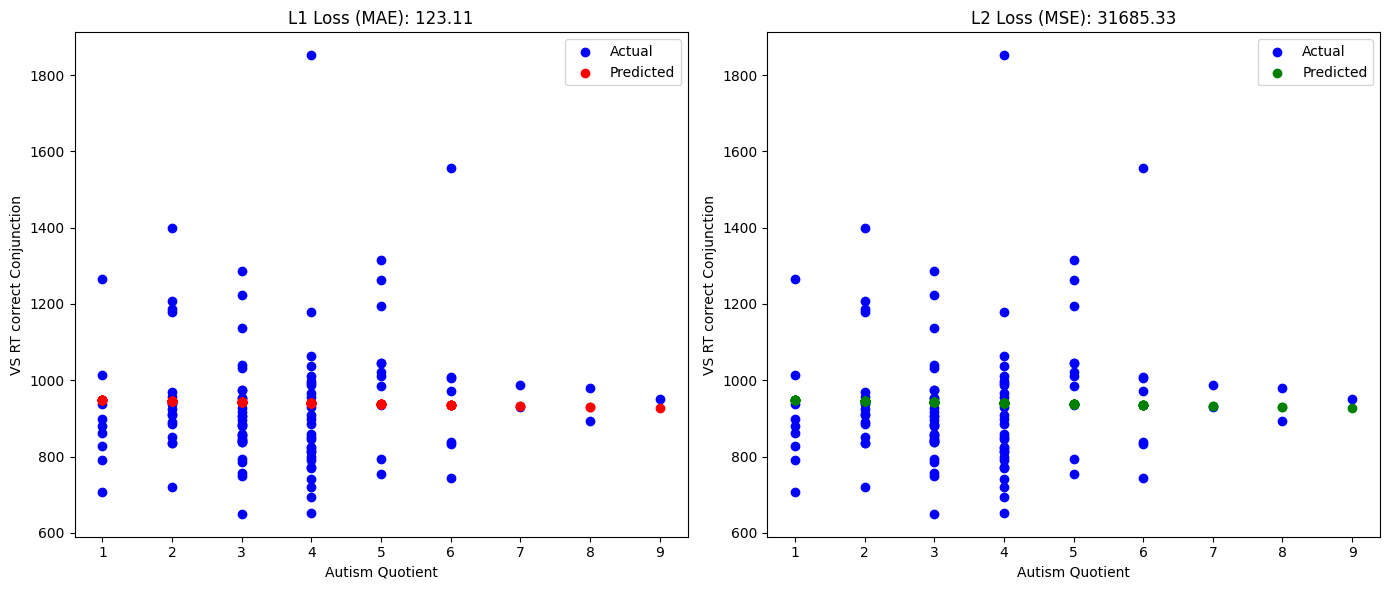

(123.109607987142, 31685.33343068115)

In [123]:
# As this dataset is suitable for regression tasks, L1 and L2 loss functions can be applied to it.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Reload the dataset
phone_data = pd.read_csv('MASTER_PhonesmartdataAll_CCI_AdvStats.csv')

# Data Preprocessing
# Converting 'AutismQuotient' and 'VS_RT_correct_Conjunction' to numeric and handling missing values
phone_data['AutismQuotient'] = pd.to_numeric(phone_data['AutismQuotient'], errors='coerce')
phone_data['VS_RT_correct_Conjunction'] = pd.to_numeric(phone_data['VS_RT_correct_Conjunction'], errors='coerce')

# Dropping rows with missing values in these columns for this analysis
phone_data_cleaned = phone_data.dropna(subset=['AutismQuotient', 'VS_RT_correct_Conjunction'])

# Selecting features for the regression model
X = phone_data_cleaned[['AutismQuotient']]
y = phone_data_cleaned['VS_RT_correct_Conjunction']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Calculating L1 and L2 losses
l1_loss = mean_absolute_error(y_test, y_pred)
l2_loss = mean_squared_error(y_test, y_pred)

# Plotting
plt.figure(figsize=(14, 6))

# Plot for L1 Loss
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.title(f'L1 Loss (MAE): {l1_loss:.2f}')
plt.xlabel('Autism Quotient')
plt.ylabel('VS RT correct Conjunction')
plt.legend()

# Plot for L2 Loss
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='green', label='Predicted')
plt.title(f'L2 Loss (MSE): {l2_loss:.2f}')
plt.xlabel('Autism Quotient')
plt.ylabel('VS RT correct Conjunction')
plt.legend()

plt.tight_layout()
plt.show()

l1_loss, l2_loss

**From the Mean Absolute Error of L1 and Mean Squared Error of L2, we can see the L1 loss plot provides an average deviation of predictions from actual values, while the L2 loss plot, due to squaring the errors, gives more weight to larger errors, therefore L1 is better for this dataset.**

### **Housing.csv**

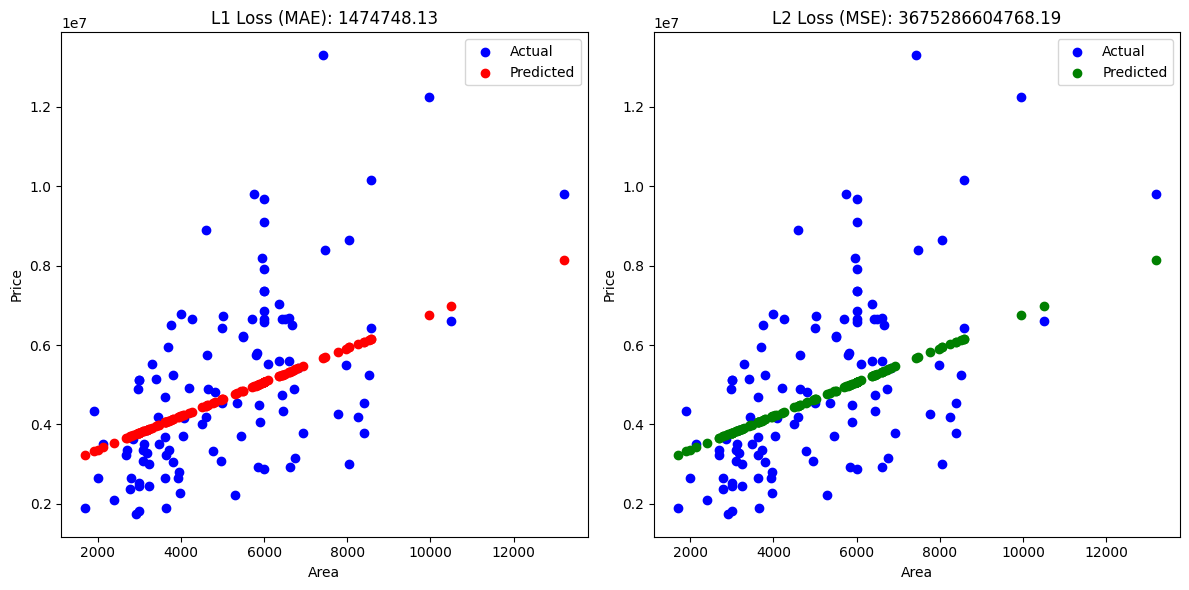

(1474748.1337969352, 3675286604768.185)

In [122]:
# As Housing.csv is suitable for regression tasks, L1 and L2 loss functions can be applied to it.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Reload dataset for convenience
housing_data = pd.read_csv('Housing.csv')

# Selecting a numerical feature and the target for regression
# Assuming 'area' as the feature and 'price' as the target
X = housing_data[['area']]
y = housing_data['price']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Linear Regression model
model = LinearRegression()

# Fitting the model
model.fit(X_train, y_train)

# Predicting values
y_pred = model.predict(X_test)

# Calculating L1 Loss (Mean Absolute Error)
l1_loss = mean_absolute_error(y_test, y_pred)

# Calculating L2 Loss (Mean Squared Error)
l2_loss = mean_squared_error(y_test, y_pred)

# Plotting the results
plt.figure(figsize=(12, 6))

# Actual vs Predicted for L1
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.title('L1 Loss (MAE): {:.2f}'.format(l1_loss))
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()

# Actual vs Predicted for L2
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='green', label='Predicted')
plt.title('L2 Loss (MSE): {:.2f}'.format(l2_loss))
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()

l1_loss, l2_loss

**The L1 loss plot indicates how far off the predictions are from the actual values on average, while the L2 loss plot emphasizes larger errors more due to squaring the differences. The large difference in scale between L1 and L2 loss values is typical, as L2 loss tends to be much higher when large errors exist, due to the squaring effect. If we consider about the MAE of both loss functions, L2 loss functions works better for Housing.csv.**

### **wine_data.csv**

**L1 and L2 Loss Functions**

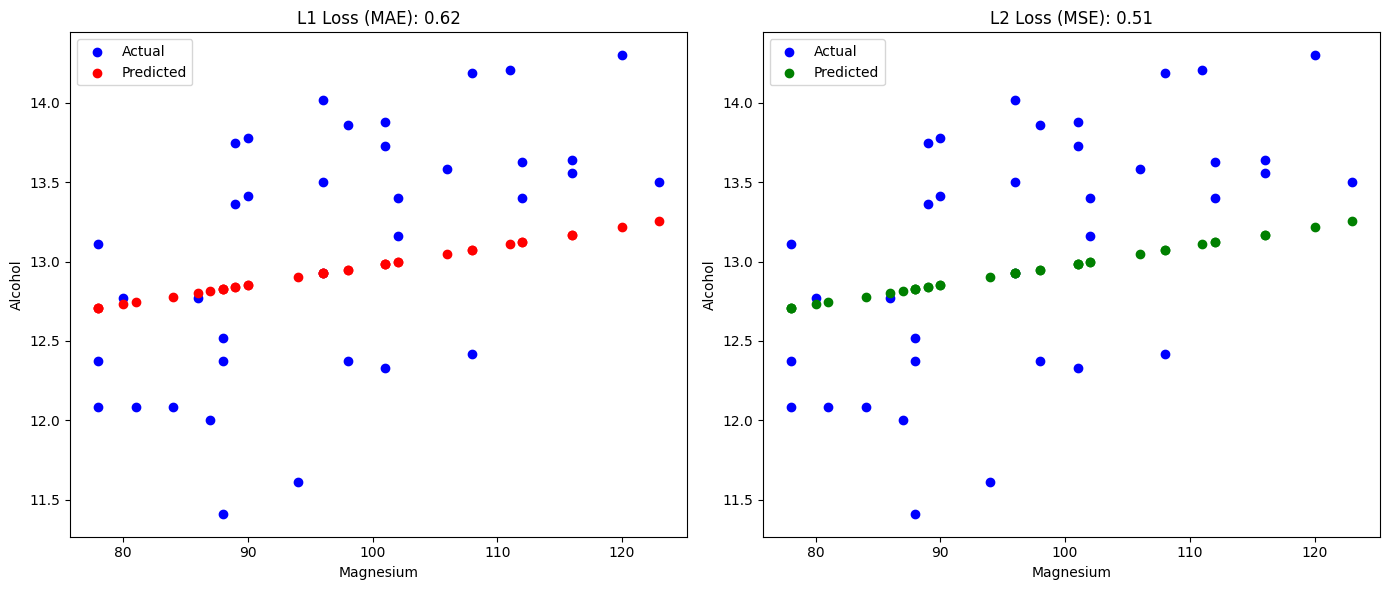

(0.6225815965197203, 0.5082640466043304)

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Reload the dataset
wine_data = pd.read_csv('wine_data.csv')

# For demonstration, let's predict 'alcohol' based on 'magnesium'
X = wine_data[['magnesium']]
y = wine_data['alcohol']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Calculating L1 and L2 losses
l1_loss = mean_absolute_error(y_test, y_pred)
l2_loss = mean_squared_error(y_test, y_pred)

# Plotting
plt.figure(figsize=(14, 6))

# Plot for L1 Loss
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.title(f'L1 Loss (MAE): {l1_loss:.2f}')
plt.xlabel('Magnesium')
plt.ylabel('Alcohol')
plt.legend()

# Plot for L2 Loss
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='green', label='Predicted')
plt.title(f'L2 Loss (MSE): {l2_loss:.2f}')
plt.xlabel('Magnesium')
plt.ylabel('Alcohol')
plt.legend()

plt.tight_layout()
plt.show()

l1_loss, l2_loss

**In this case, two loss functions do not have much difference.**

**Log loss, Categorical cross entropy loss and Hinge loss**

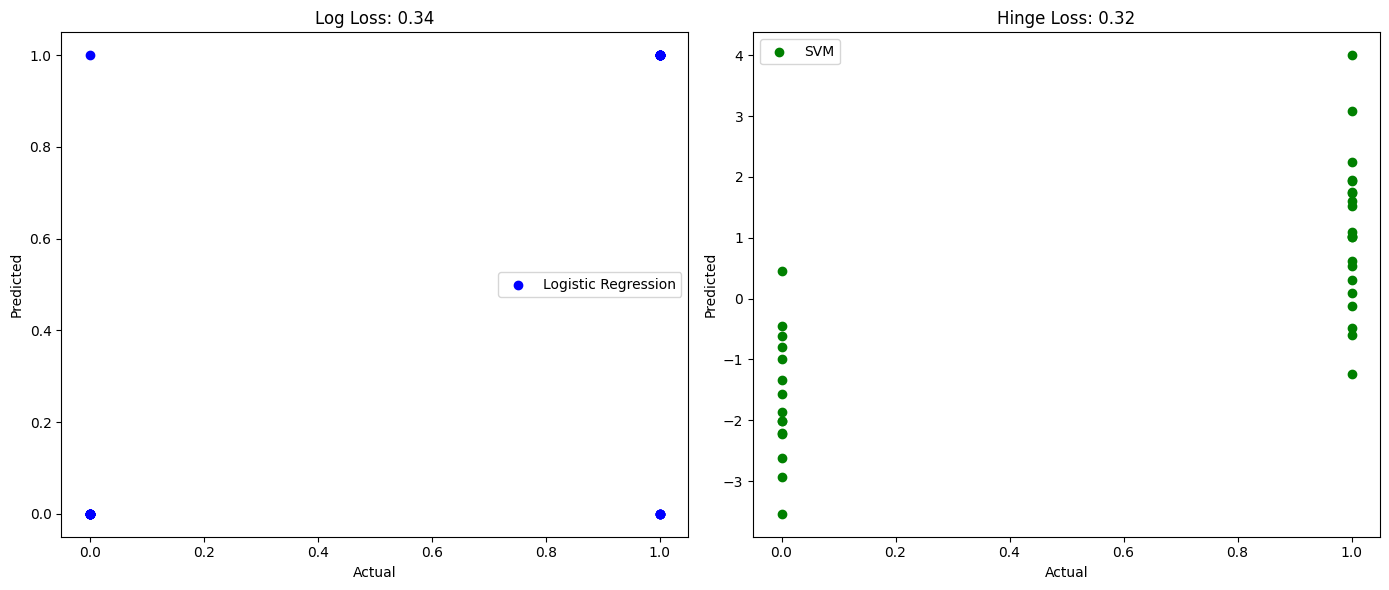

Log Loss: 0.3437513501670424
Hinge Loss: 0.3191351120051508


In [125]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import log_loss, hinge_loss
from sklearn.preprocessing import StandardScaler

# Load the dataset
wine_data = pd.read_csv('wine_data.csv')

# Data Preparation: Create a binary target variable based on the median of 'alcohol'
median_alcohol = wine_data['alcohol'].median()
wine_data['high_alcohol'] = (wine_data['alcohol'] > median_alcohol).astype(int)

# Selecting features and target
X = wine_data.drop(['Unnamed: 0', 'alcohol', 'high_alcohol'], axis=1)
y = wine_data['high_alcohol']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training
# Logistic Regression for Log Loss
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)
logistic_pred_proba = logistic_model.predict_proba(X_test_scaled)[:, 1]
logistic_pred = logistic_model.predict(X_test_scaled)

# SVM for Hinge Loss
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.decision_function(X_test_scaled)

# Calculating Losses
log_loss_value = log_loss(y_test, logistic_pred_proba)
hinge_loss_value = hinge_loss(y_test, svm_pred)

# Plotting the results
plt.figure(figsize=(14, 6))

# Plot for Logistic Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, logistic_pred, color='blue', label='Logistic Regression')
plt.title(f'Log Loss: {log_loss_value:.2f}')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()

# Plot for SVM
plt.subplot(1, 2, 2)
plt.scatter(y_test, svm_pred, color='green', label='SVM')
plt.title(f'Hinge Loss: {hinge_loss_value:.2f}')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()

plt.tight_layout()
plt.show()

# Output the losses
print("Log Loss:", log_loss_value)
print("Hinge Loss:", hinge_loss_value)


**As Catrgorical cross entropy loss is only suitable for multiple class dataset therefore here we only applied Log loss and Hinge loss**

**Both loss functions provide different perspectives on the model's performance. Log loss focuses on the probability estimates, making it a suitable choice for models where predicting the correct class probability is crucial. Hinge loss, on the other hand, is more focused on the correct classification and margin maximization, making it suitable for cases where the decision boundary between classes is of primary interest.**

### **data.csv**

In [126]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import log_loss, hinge_loss
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('data.csv')

# Encoding categorical labels
le = LabelEncoder()
data['label_encoded'] = le.fit_transform(data['label'])

# Selecting features and target
X = data.drop(['filename', 'label', 'label_encoded'], axis=1)
y = data['label_encoded']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Logistic Regression for Log Loss and Categorical Cross-Entropy
logistic_model = LogisticRegression(max_iter=1000, multi_class='multinomial')
logistic_model.fit(X_train, y_train)
logistic_pred_proba = logistic_model.predict_proba(X_test)

# SVM for Hinge Loss
svm_model = SVC(kernel='linear', decision_function_shape='ovr', probability=True)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.decision_function(X_test)

# Calculating Log Loss (same as Categorical Cross-Entropy in this context)
log_loss_value = log_loss(y_test, logistic_pred_proba)

# Calculating Hinge Loss (for multi-class, we binarize the labels)
y_test_binarized = LabelBinarizer().fit_transform(y_test)
hinge_loss_value = np.mean([hinge_loss(y_test_binarized[:, i], svm_pred[:, i]) for i in range(y_test_binarized.shape[1])])

print("Log Loss:", log_loss_value)
print("Hinge Loss:", hinge_loss_value)


Log Loss: 1.0855268569385619
Hinge Loss: 4.605404009337947


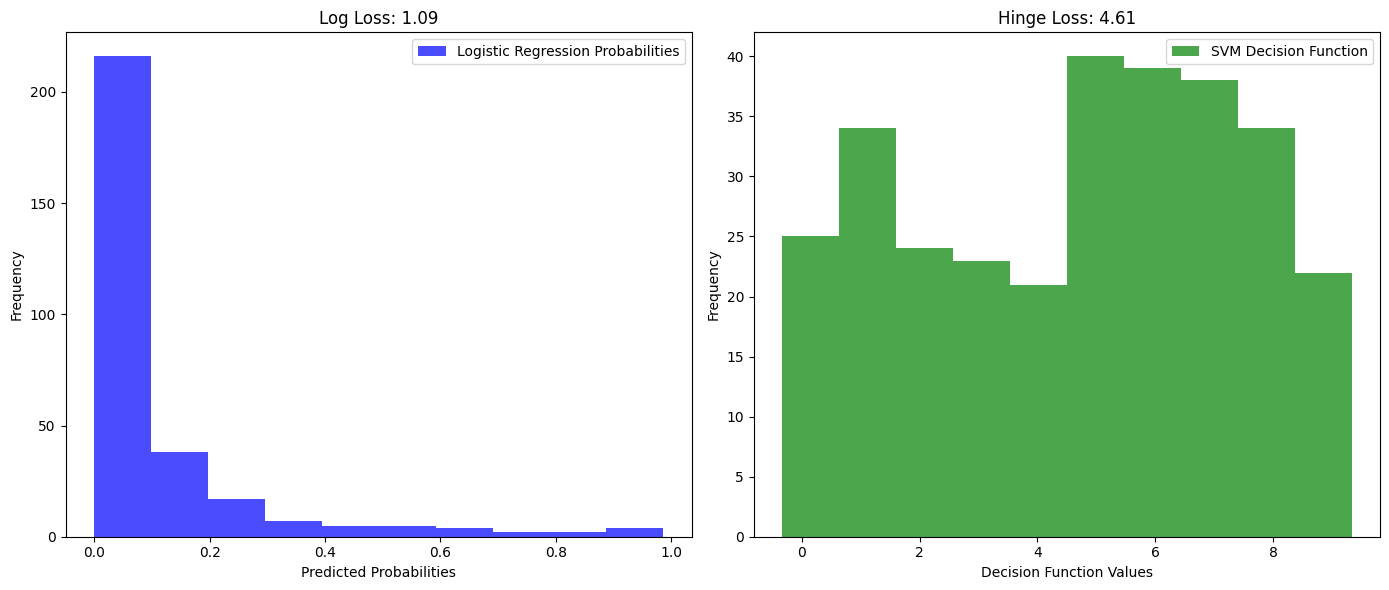

In [127]:
import matplotlib.pyplot as plt

# Plotting the results
plt.figure(figsize=(14, 6))

# Plot for Logistic Regression (Probabilities for Log Loss)
plt.subplot(1, 2, 1)
# Getting predicted probabilities for a specific class (e.g., class 0)
probabilities = logistic_pred_proba[:, 0]
plt.hist(probabilities, bins=10, color='blue', alpha=0.7, label='Logistic Regression Probabilities')
plt.title(f'Log Loss: {log_loss_value:.2f}')
plt.xlabel('Predicted Probabilities')
plt.ylabel('Frequency')
plt.legend()

# Plot for SVM (Decision Function for Hinge Loss)
plt.subplot(1, 2, 2)
# Getting decision function values
decisions = svm_pred[:, 0]
plt.hist(decisions, bins=10, color='green', alpha=0.7, label='SVM Decision Function')
plt.title(f'Hinge Loss: {hinge_loss_value:.2f}')
plt.xlabel('Decision Function Values')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

**The log loss plot shows the distribution of predicted probabilities for a selected class. The hinge loss illustrates the distribution of the decision function values. Higher absolute values indicate a higher confidence in the classification.**

# **5.**
**Also choose any one non-linear dataset from the datasets provided and try any kernel transformation to linear space and then fit model and assess accuracy.**

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Reload the dataset
housing_data = pd.read_csv('Housing.csv')

# Preprocessing the data
# Dropping rows with missing values
housing_data_cleaned = housing_data.dropna()

# Encoding categorical variables
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
numeric_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Splitting the dataset into features and target variable
X = housing_data.drop('price', axis=1)
y = housing_data['price']  # Assuming 'price' is the target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using SVC with RBF kernel (a common kernel for transforming to linear space)
svc_model = SVC(kernel='rbf')

# Creating a pipeline that first transforms the data and then applies the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', svc_model)
])

# Fitting the model
pipeline.fit(X_train, y_train)

# Predicting the test set results
y_pred = pipeline.predict(X_test)

# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.009174311926605505

**Using an SVM with an RBF kernel, the accuracy is quite poor, which is at approximately 0.92%.This is a very low accuracy score, indicating that the model is not performing well on this task.**

**Dividing the target 'price' into a few classes (e.g. low/medium/high) should improve the performance.**

**Also SVM with an RBF kernel might be too complex or not suitable for this particular dataset. The choice of kernel and its parameters (like gamma in the RBF kernel) can significantly impact the performance.**

# **6.**

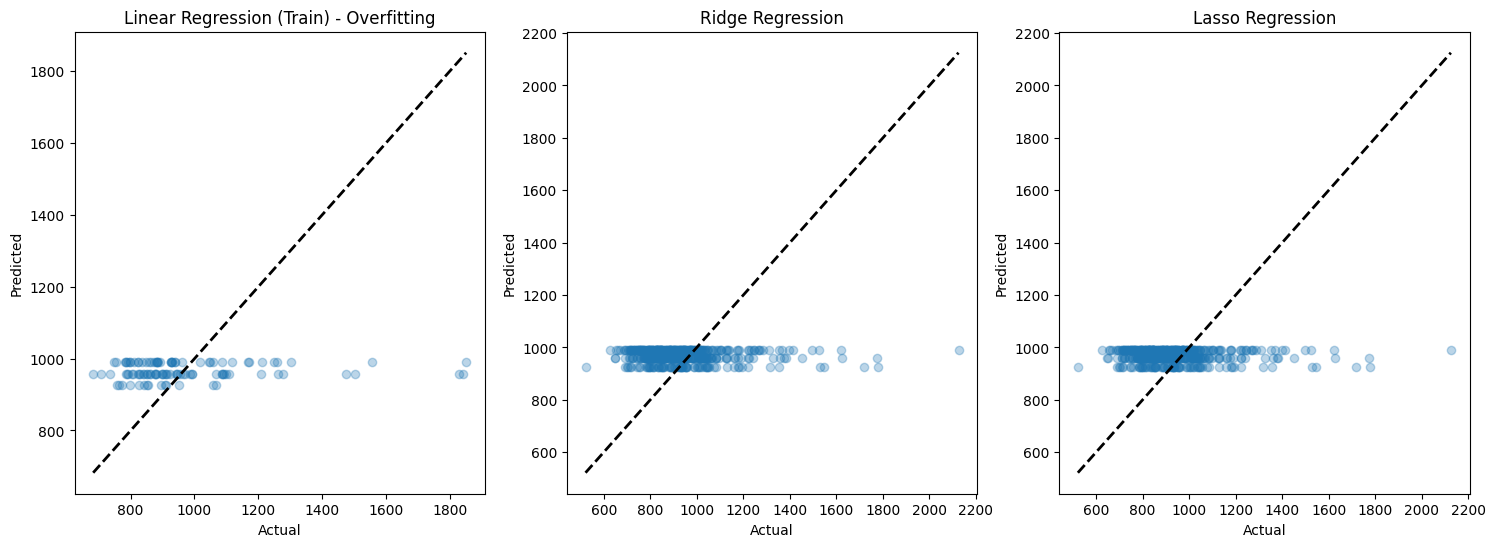

Linear Regression (Train) MSE: 47804.01776637224
Linear Regression (Test) MSE: 37599.031523468206
Linear Regression (Train) R^2: 0.01010632375337095
Linear Regression (Test) R^2: -0.06038625657280483
Ridge Regression MSE: 37563.92762805119
Ridge Regression R^2: -0.059396239363741055
Lasso Regression MSE: 37587.04436347694
Lasso Regression R^2: -0.06004818883023155


In [134]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Reload the dataset
phone_data = pd.read_csv('MASTER_PhonesmartdataAll_CCI_AdvStats.csv')

# Selecting features and target for regression
# Assuming 'VS_RT_correct_Conjunction' as the target variable
X = phone_data.drop(['VS_RT_correct_Conjunction', 'VS_RT_correct_Single'], axis=1)
y = phone_data['VS_RT_correct_Conjunction']

# Handling missing values and non-numeric data
# For simplicity, we'll impute missing numeric values and drop non-numeric columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
X_numeric = X[numeric_features]

# Imputing missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_numeric)

# Creating a small training set to induce overfitting
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.8, random_state=42)

# Linear Regression Model (likely to overfit)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_train_lr = lr_model.predict(X_train)
y_pred_test_lr = lr_model.predict(X_test)

# Assessing Overfitting
mse_train_lr = mean_squared_error(y_train, y_pred_train_lr)
mse_test_lr = mean_squared_error(y_test, y_pred_test_lr)
r2_train_lr = r2_score(y_train, y_pred_train_lr)
r2_test_lr = r2_score(y_test, y_pred_test_lr)

# Applying Regularization - Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_test_ridge = ridge_model.predict(X_test)
mse_test_ridge = mean_squared_error(y_test, y_pred_test_ridge)
r2_test_ridge = r2_score(y_test, y_pred_test_ridge)

# Applying Regularization - Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_test_lasso = lasso_model.predict(X_test)
mse_test_lasso = mean_squared_error(y_test, y_pred_test_lasso)
r2_test_lasso = r2_score(y_test, y_pred_test_lasso)

# Function to plot predictions
def plot_predictions(y_true, y_pred, title):
    plt.scatter(y_true, y_pred, alpha=0.3)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(title)

# Plotting predictions
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plot_predictions(y_train, y_pred_train_lr, 'Linear Regression (Train) - Overfitting')
plt.subplot(1, 3, 2)
plot_predictions(y_test, y_pred_test_ridge, 'Ridge Regression')
plt.subplot(1, 3, 3)
plot_predictions(y_test, y_pred_test_lasso, 'Lasso Regression')

plt.show()

# mse_train_lr, mse_test_lr, r2_train_lr, r2_test_lr, mse_test_ridge, r2_test_ridge, mse_test_lasso, r2_test_lasso

print("Linear Regression (Train) MSE:", mse_train_lr)
print("Linear Regression (Test) MSE:", mse_test_lr)
print("Linear Regression (Train) R^2:", r2_train_lr)
print("Linear Regression (Test) R^2:", r2_test_lr)
print("Ridge Regression MSE:", mse_test_ridge)
print("Ridge Regression R^2:", r2_test_ridge)
print("Lasso Regression MSE:", mse_test_lasso)
print("Lasso Regression R^2:", r2_test_lasso)

# **7.**

Training Accuracy: 1.0
Test Accuracy: 0.4766666666666667


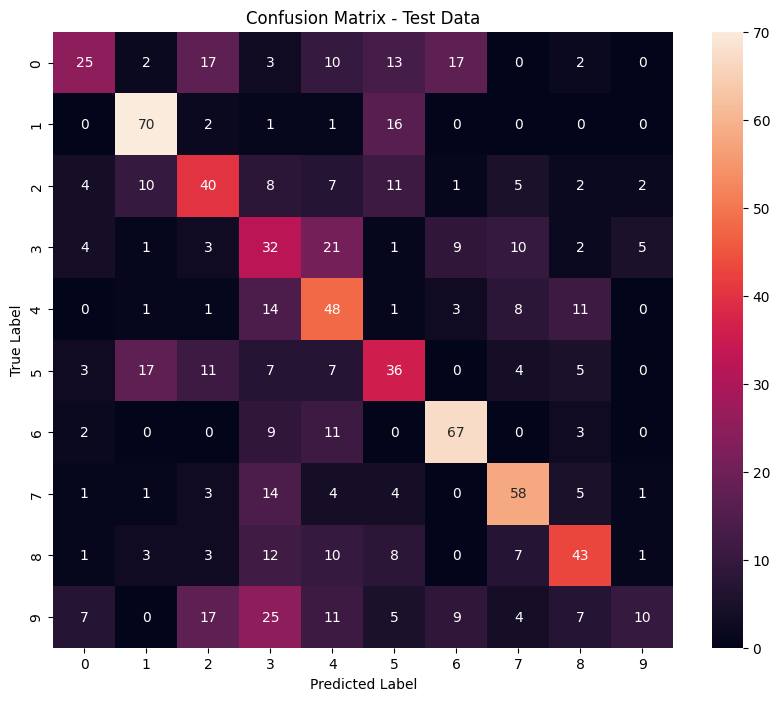

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Reload the dataset
data = pd.read_csv('data.csv')

# Preprocessing
# Encoding the label
label_encoder = LabelEncoder()
data['label_encoded'] = label_encoder.fit_transform(data['label'])

# Selecting features and target
X = data.drop(['filename', 'label', 'label_encoded'], axis=1)
y = data['label_encoded']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into a small training set and a large test set to induce overfitting
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.9, random_state=42)

# Training a RandomForest Classifier (a complex model that can easily overfit with small training data)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting and evaluating on the training set
y_train_pred = rf_model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)

# Predicting and evaluating on the test set
y_test_pred = rf_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)

# Displaying the accuracy
print(f"Training Accuracy: {accuracy_train}")
print(f"Test Accuracy: {accuracy_test}")

# Confusion Matrix for Test Data
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.title("Confusion Matrix - Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Test Accuracy with Reduced Estimators: 0.4266666666666667
Test Accuracy with Limited Depth: 0.4533333333333333


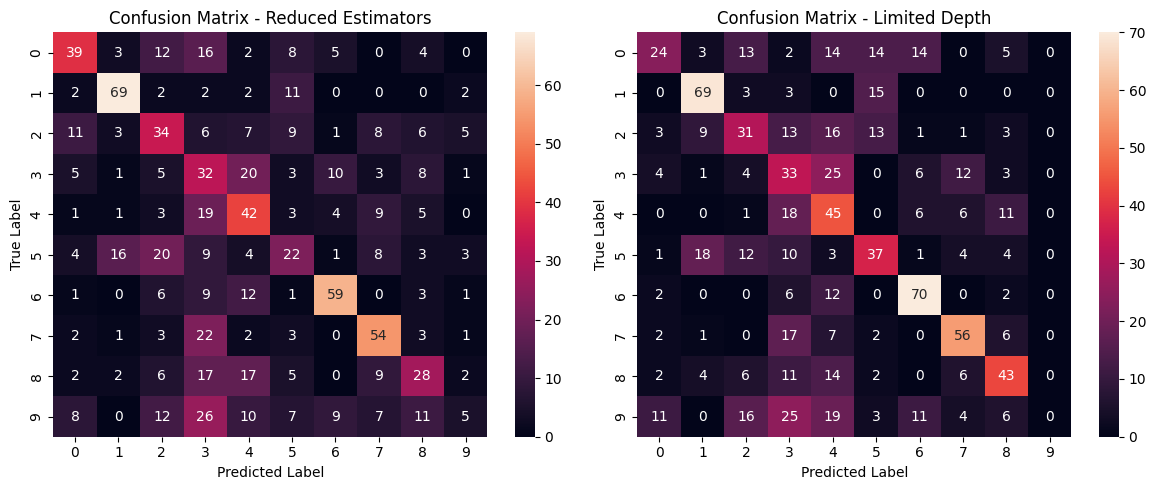

In [136]:
# Regularization Technique 1: Reducing the Number of Estimators
rf_model_reduced_estimators = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model_reduced_estimators.fit(X_train, y_train)
y_test_pred_reduced_estimators = rf_model_reduced_estimators.predict(X_test)
accuracy_test_reduced_estimators = accuracy_score(y_test, y_test_pred_reduced_estimators)

# Regularization Technique 2: Limiting the Maximum Depth of Trees
rf_model_limited_depth = RandomForestClassifier(max_depth=5, random_state=42)
rf_model_limited_depth.fit(X_train, y_train)
y_test_pred_limited_depth = rf_model_limited_depth.predict(X_test)
accuracy_test_limited_depth = accuracy_score(y_test, y_test_pred_limited_depth)

# Comparing the accuracies
print("Test Accuracy with Reduced Estimators:", accuracy_test_reduced_estimators)
print("Test Accuracy with Limited Depth:", accuracy_test_limited_depth)

# Confusion Matrix for Regularized Models
plt.figure(figsize=(12, 5))

# Reduced Estimators
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_test_pred_reduced_estimators), annot=True, fmt='g')
plt.title("Confusion Matrix - Reduced Estimators")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Limited Depth
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_test_pred_limited_depth), annot=True, fmt='g')
plt.title("Confusion Matrix - Limited Depth")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.tight_layout()
plt.show()

# **8.**

In [139]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Function to train and evaluate a decision tree
def train_evaluate_decision_tree(X_train, X_test, y_train, y_test, max_depth=None):
    dt_classifier = DecisionTreeClassifier(max_depth=max_depth)
    dt_classifier.fit(X_train, y_train)
    y_pred = dt_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Loading the datasets
phone_data = pd.read_csv('MASTER_PhonesmartdataAll_CCI_AdvStats.csv')
wine_data = pd.read_csv('wine_data.csv')

# Preprocessing Phone Data
phone_data = phone_data.select_dtypes(include=['int64', 'float64'])  # Selecting only numeric columns
phone_data = phone_data.dropna()  # Dropping rows with missing values
phone_data['Year'] = phone_data['Year'].astype('category')  # Assuming 'Year' as a categorical target
y_phone = phone_data['Year']
X_phone = phone_data.drop('Year', axis=1)

# Splitting Phone Data
X_train_phone, X_test_phone, y_train_phone, y_test_phone = train_test_split(X_phone, y_phone, test_size=0.3, random_state=42)

# Preprocessing Wine Data
median_alcohol = wine_data['alcohol'].median()
wine_data['high_alcohol'] = (wine_data['alcohol'] > median_alcohol).astype(int)  # Binary classification target
y_wine = wine_data['high_alcohol']
X_wine = wine_data.drop(['Unnamed: 0', 'alcohol', 'high_alcohol'], axis=1)

# Splitting Wine Data
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.3, random_state=42)

# Applying Decision Tree without and with pruning for both datasets
results = {}
for dataset_name, X_train, X_test, y_train, y_test in [
    ("Phone Data", X_train_phone, X_test_phone, y_train_phone, y_test_phone),
    ("Wine Data", X_train_wine, X_test_wine, y_train_wine, y_test_wine)]:

    # Without Pruning
    accuracy_no_prune = train_evaluate_decision_tree(X_train, X_test, y_train, y_test)
    # With Pruning
    accuracy_prune = train_evaluate_decision_tree(X_train, X_test, y_train, y_test, max_depth=3)

    results[dataset_name] = {
        "No Pruning": accuracy_no_prune,
        "With Pruning": accuracy_prune
    }

print(results)


{'Phone Data': {'No Pruning': 0.40606060606060607, 'With Pruning': 0.43636363636363634}, 'Wine Data': {'No Pruning': 0.7777777777777778, 'With Pruning': 0.8148148148148148}}


### **RESULT**

**MASTER_PhonesmartdataAll_CCI_AdvStats.csv**

**No Pruning:** 0.40606060606060607

**With Pruning:** 0.43636363636363634

**wine_data.csv** 

**No Pruning:** 0.7777777777777778

**With Pruning:** 0.8148148148148148